In [1]:
%matplotlib inline

In [7]:
import nbodykit.lab as nlab
import numpy as nb
import h5py
import matplotlib.pyplot as plt

['Length', 'Position', 'Selection', 'Velocity', 'Weight']


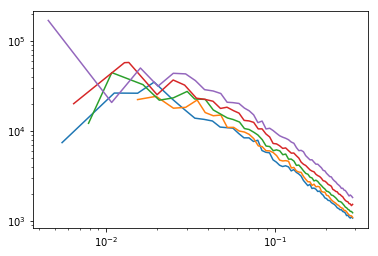

In [8]:
cat = nlab.HDFCatalog('/Users/ding/Documents/playground/WiggleNowiggle/1test_data/normal-fof00100_0.6452_0.168.hdf5', 'FOFGroups')
cat.columns
print(cat.columns)
cat['Position'][:10].compute()

cat['Position'] = cat['Position'] * cat.attrs['BoxSize']
cat['VelocityOffset'] = cat['Velocity'] * cat.attrs['BoxSize']
"# add RSD\n",
cat['Position'] = cat['Position'] + cat['VelocityOffset'] * [0, 0, 1]
cat['Selection'] = cat['Length'] * 1e12 > 1e13

cat['Position'][:10].compute()
cat['VelocityOffset'][:10].compute()

r = nlab.FFTPower(cat, mode='2d', Nmesh=128)

plt.loglog(r.power['k'], abs(r.power['power']))
plt.show()